In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
wine_Quality = pd.read_csv("WineQT.csv")
wine_Quality.columns = wine_Quality.columns.str.strip()
wine_Quality.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [3]:
wine_Quality.shape


(1143, 13)

In [4]:
wine_Quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [5]:
wine_Quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


***Data Preprocessing***

***Missing Values***

In [6]:
wine_Quality.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
wine_Quality.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [8]:
wine_Quality.nunique()


fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

***Remove Outliers***

In [9]:
Numerical_col=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id']

In [10]:
#Remove outliers from numerical variables
z_scores = np.abs(stats.zscore(wine_Quality[Numerical_col]))
threshold = 3
data_cleaned = wine_Quality[(z_scores < threshold).all(axis=1)]

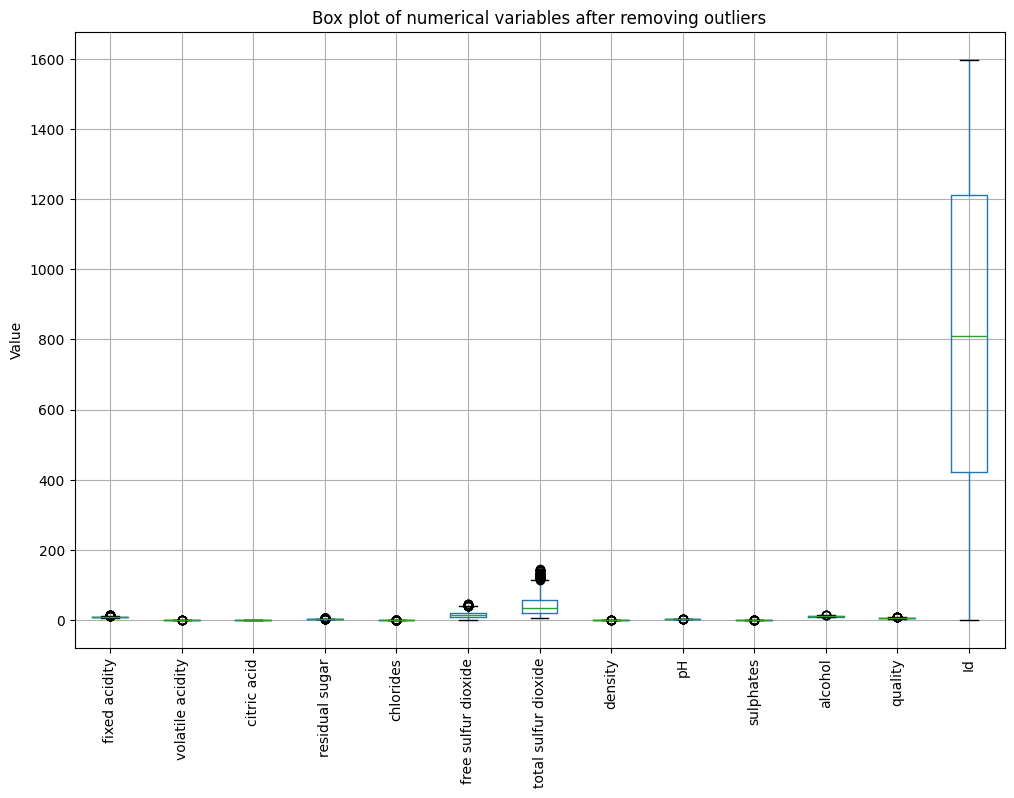

In [11]:
#box plotting after removing outliers
plt.figure(figsize=(12, 8))
data_cleaned[Numerical_col].boxplot()
plt.title("Box plot of numerical variables after removing outliers")
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

***Normalization***

In [12]:
features = wine_Quality.drop(columns=['quality', 'Id'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with scaled features and add the 'quality' and 'Id' columns back
scaled_wine_Quality = pd.DataFrame(scaled_features, columns=features.columns)
scaled_wine_Quality['quality'] = wine_Quality['quality']
scaled_wine_Quality['Id'] = wine_Quality['Id']


In [13]:
wine_Quality.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

***Exploratory Data Analysis***

***Distribution of Feature***

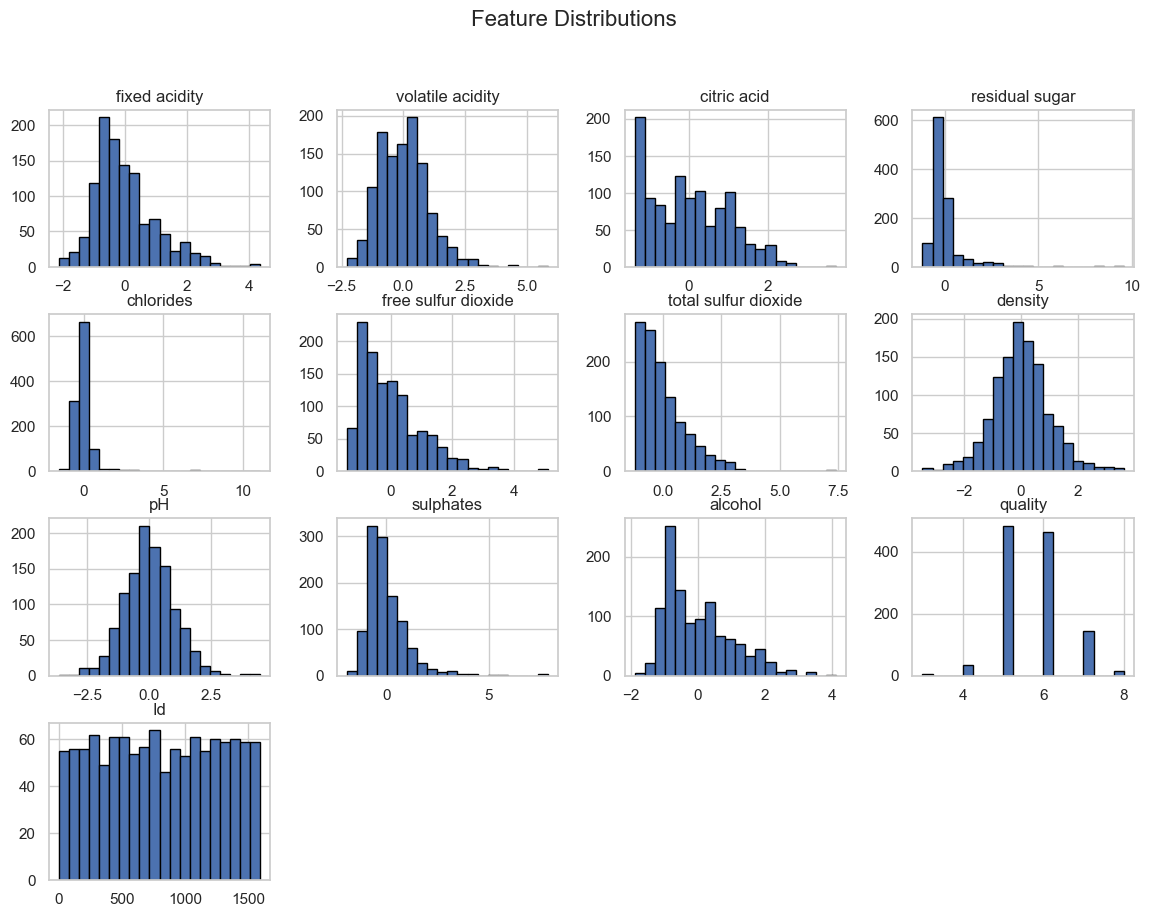

In [14]:
# Set the style of the visualizations
sns.set(style='whitegrid')

# Plot histograms for each feature
scaled_wine_Quality.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

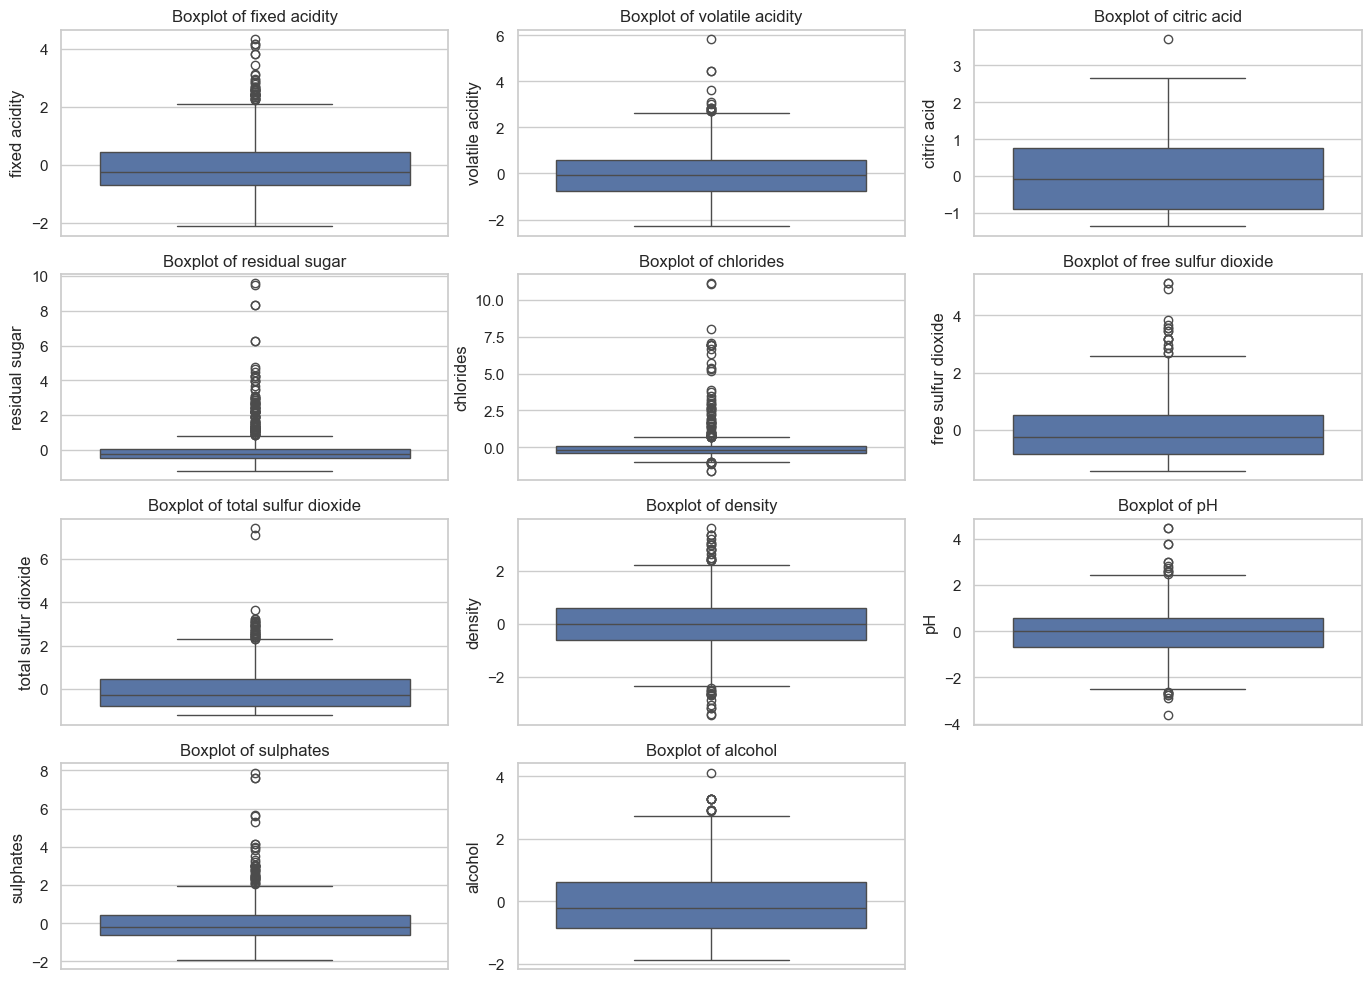

In [15]:
# Boxplots for each feature
plt.figure(figsize=(14, 10))
for i, column in enumerate(scaled_wine_Quality.columns[:-2], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=scaled_wine_Quality[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


***Relationsheep between Feature and Wine Quality***

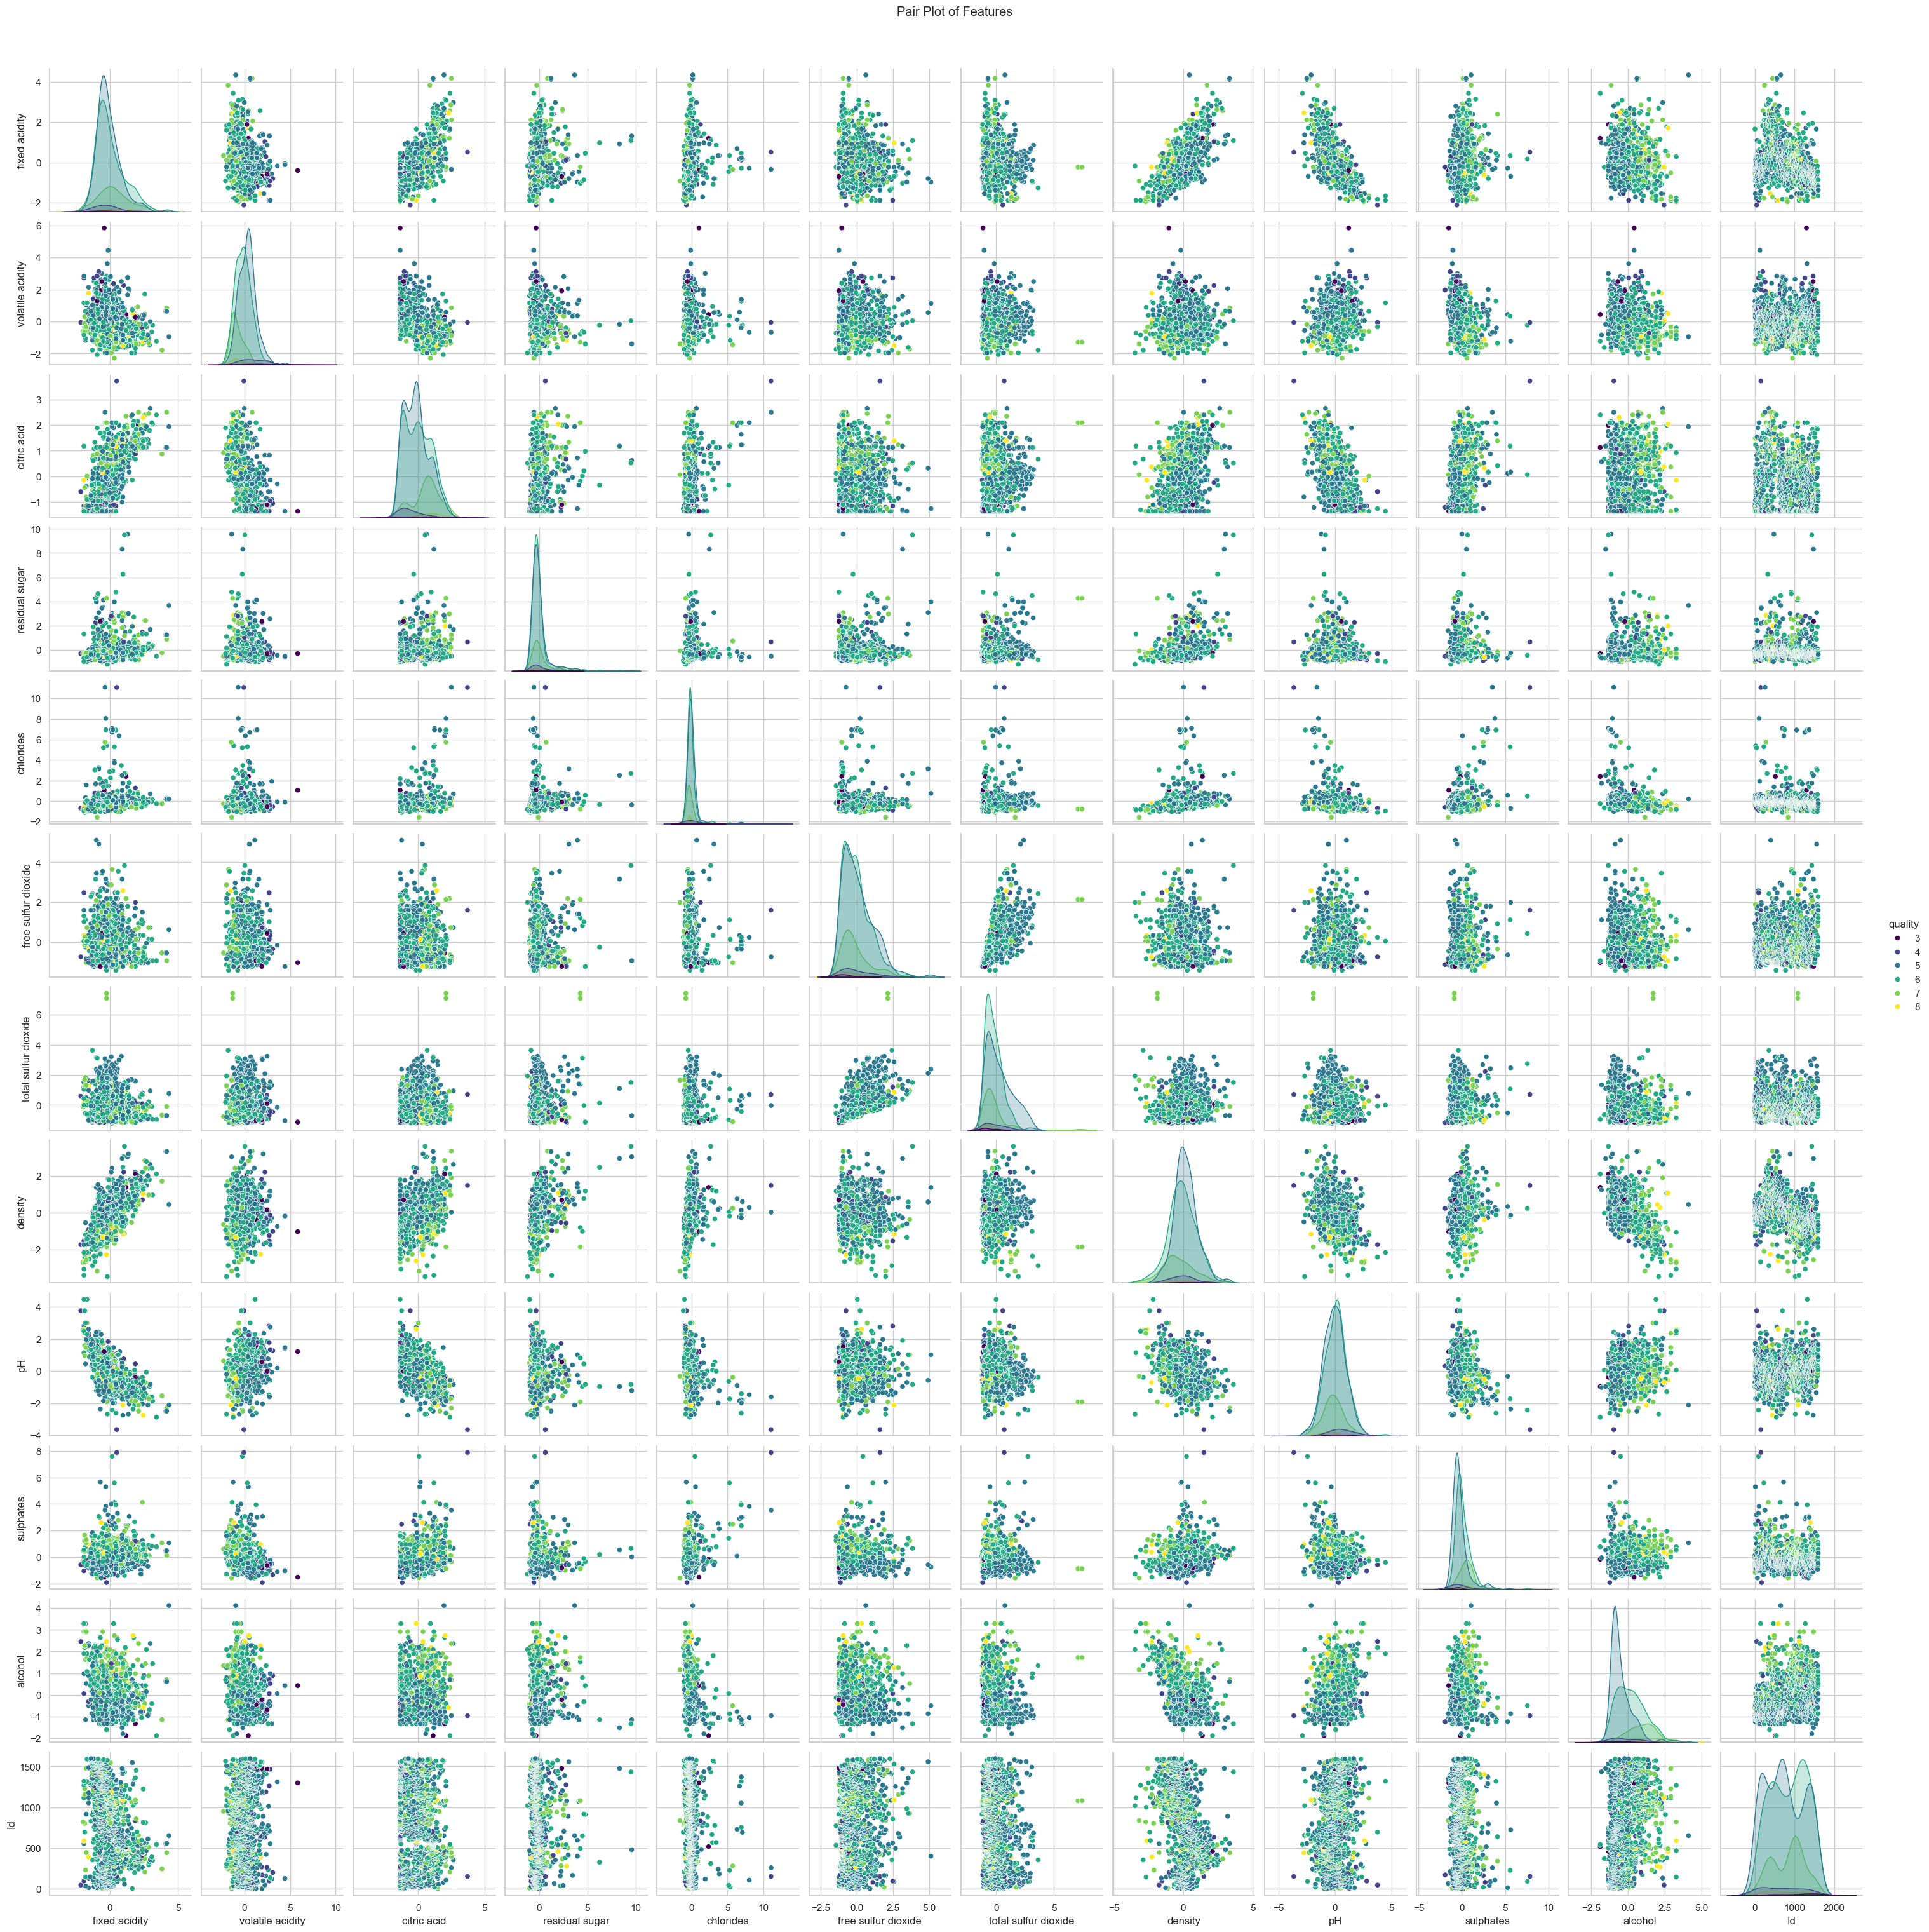

In [16]:
# Pair plot to visualize relationships between features and quality
sns.pairplot(scaled_wine_Quality, hue='quality', palette='viridis')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

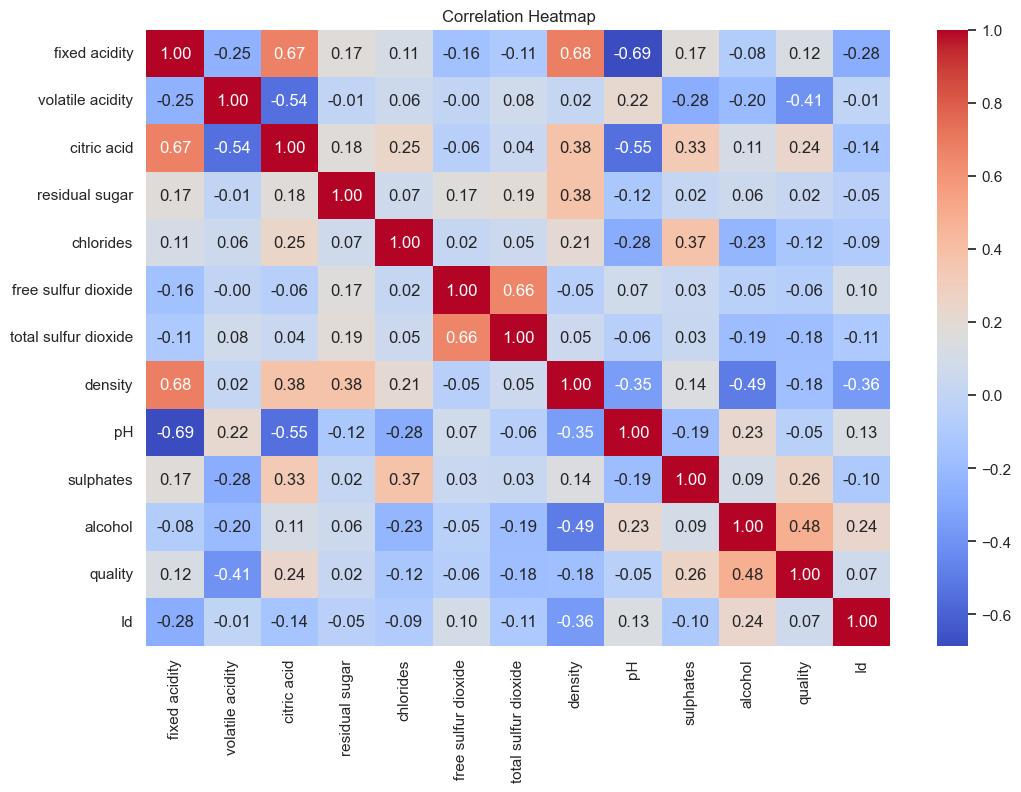

In [17]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = scaled_wine_Quality.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

***Model Training***

***Data Spiliting***

In [18]:
# Define features and target variable
X = scaled_wine_Quality.drop(columns=['quality', 'Id'])
y = scaled_wine_Quality['quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((914, 11), (229, 11), (914,), (229,))

***Train Classifier Models***

In [19]:

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
sgd_model = SGDClassifier(random_state=42)
svc_model = SVC(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

SVC(random_state=42)

***Evaluate the model***

In [25]:
# Define a function to evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    return accuracy, precision, recall, f1

In [26]:
# Evaluate the Random Forest model
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(rf_model, X_test, y_test)


In [27]:
# Evaluate the SGD model
sgd_accuracy, sgd_precision, sgd_recall, sgd_f1 = evaluate_model(sgd_model, X_test, y_test)

In [28]:
# Evaluate the SVC model
svc_accuracy, svc_precision, svc_recall, svc_f1 = evaluate_model(svc_model, X_test, y_test)


In [29]:
# Display the results
print(f"Random Forest - Accuracy: {rf_accuracy:.2f}, Precision: {rf_precision:.2f}, Recall: {rf_recall:.2f}, F1 Score: {rf_f1:.2f}")
print(f"SGD - Accuracy: {sgd_accuracy:.2f}, Precision: {sgd_precision:.2f}, Recall: {sgd_recall:.2f}, F1 Score: {sgd_f1:.2f}")
print(f"SVC - Accuracy: {svc_accuracy:.2f}, Precision: {svc_precision:.2f}, Recall: {svc_recall:.2f}, F1 Score: {svc_f1:.2f}")

Random Forest - Accuracy: 0.69, Precision: 0.70, Recall: 0.69, F1 Score: 0.68
SGD - Accuracy: 0.60, Precision: 0.60, Recall: 0.60, F1 Score: 0.59
SVC - Accuracy: 0.64, Precision: 0.65, Recall: 0.64, F1 Score: 0.62


***Visualize the Data***

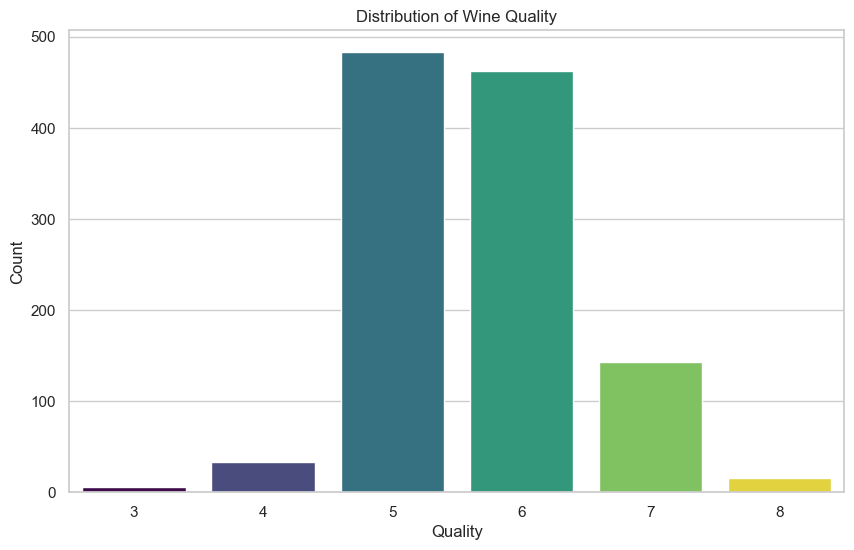

In [33]:
#Distribution of Wine Quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine_Quality, palette='viridis', hue='quality', dodge=False)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.legend([],[], frameon=False)  # Remove the legend
plt.show()

C:\Users\hp5cd\AppData\Local\Temp\ipykernel_23000\2624655322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='pH', data=wine_Quality, palette='viridis')


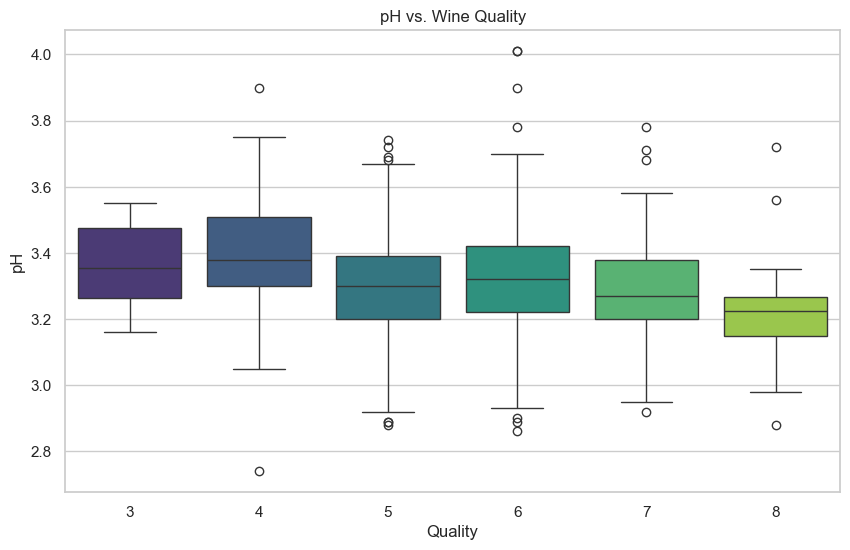

In [39]:
#pH vs Wine Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='pH', data=wine_Quality, palette='viridis')
plt.title('pH vs. Wine Quality')
plt.xlabel('Quality')
plt.ylabel('pH')
plt.show()

***Pair plot of selected Features***

***Alcohol vs Residual Sugar***

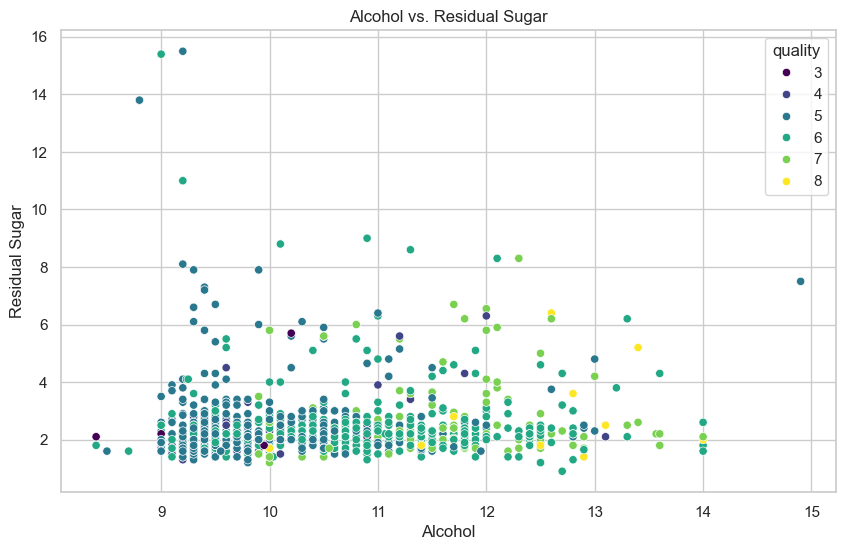

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='residual sugar', hue='quality', palette='viridis', data=wine_Quality)
plt.title('Alcohol vs. Residual Sugar')
plt.xlabel('Alcohol')
plt.ylabel('Residual Sugar')
plt.show()

***pH vs Fixed Acidity***

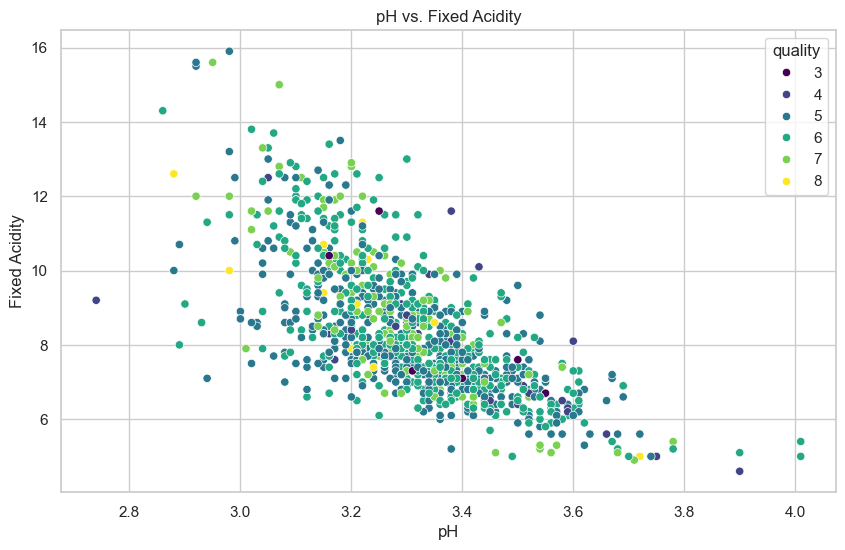

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pH', y='fixed acidity', hue='quality', palette='viridis', data=wine_Quality)
plt.title('pH vs. Fixed Acidity')
plt.xlabel('pH')
plt.ylabel('Fixed Acidity')
plt.show()


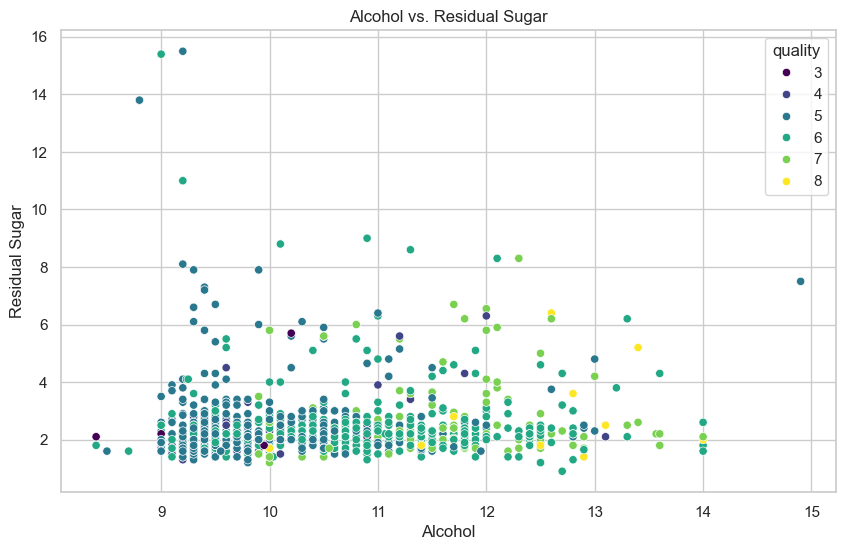

In [45]:
#Alcohol vs. Residual Sugar
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='residual sugar', hue='quality', palette='viridis', data=wine_Quality)
plt.title('Alcohol vs. Residual Sugar')
plt.xlabel('Alcohol')
plt.ylabel('Residual Sugar')
plt.show()